# Natural Language Processing with Disaster Tweets 

In [1]:
# Import spaCy and load the language library. Remember to use a larger model!

import spacy
nlp =spacy.load('en_core_web_lg')

In [2]:


import numpy as np
import pandas as pd

import nltk
import re
import string

In [3]:
train_disaster =pd.read_csv("train.csv" ,encoding='unicode_escape',error_bad_lines=False)
train_disaster

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
train_disaster['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

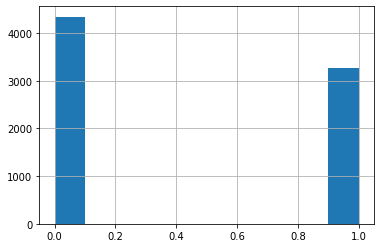

In [5]:
train_disaster['target'].hist()

We can see that  class 1 is almost 50 percent of class 0 hence we shall not proceed with class balancing

# 1. Data cleaning on text data

In [6]:
# check for null values
train_disaster.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
# define a function to clean the text data
# use re. sub() function which is used to replace occurrences of a particular sub-string with another sub-string.

def text_cleaning(text):
    text =text.lower()                     # make in lower case
    text = re.sub('\[.*?@\]','',text)      # remove text in square brackets
    text =re.sub('\n' ,'',text)
    text = re.sub('\w*\d\w*','' ,text)      # remove words containing numbers
    text.lstrip("$")                        # removes $ sign from start of string   
    text.strip()
    text =re.sub('[!@#$]','',text)          # replace given characters from string
    return text
    

In [8]:
train_disaster['text'] = train_disaster['text'].apply( lambda x:text_cleaning(x))

In [9]:
train_disaster

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,", people receive wildfires evacuation orders i...",1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,aria_ahrary thetawniest the out of control wil...,1
7610,10871,NaN,NaN,. [: utc]? s of volcano hawaii. http://t.co/,1
7611,10872,NaN,NaN,police investigating after an e-bike collided ...,1


# Tokenization

In [10]:
def tokenization(text):
    tokens= re.split('W+',text)
    return tokens

train_disaster['tokenized_text'] =train_disaster['text'].apply(lambda x : tokenization(x))

# Stemming

In [11]:
from nltk.stem.porter import PorterStemmer
porter =PorterStemmer()

In [12]:
def stemming(text):
    stemtext= [porter.stem(i) for i in text]
    return stemtext

train_disaster['stemmed_text'] =train_disaster['tokenized_text'].apply(lambda x : stemming(x))

# Lemmatization

In [13]:
from nltk.stem import WordNetLemmatizer

In [14]:
lemma =WordNetLemmatizer()

In [15]:
def lemmatization(text):
    lem_text = [lemma.lemmatize(i) for i in text]
    return lem_text

train_disaster['lemmatized_text'] =train_disaster['tokenized_text'].apply(lambda x : lemmatization(x))

In [16]:
train_disaster

,id,keyword,location,text,target,tokenized_text,stemmed_text,lemmatized_text
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,[our deeds are the reason of this earthquake m...,[our deeds are the reason of this earthquake m...,[our deeds are the reason of this earthquake m...
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,[forest fire near la ronge sask. canada],[forest fire near la ronge sask. canada],[forest fire near la ronge sask. canada]
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1,[all residents asked to 'shelter in place' are...,[all residents asked to 'shelter in place' are...,[all residents asked to 'shelter in place' are...
3,6,NaN,NaN,", people receive wildfires evacuation orders i...",1,"[, people receive wildfires evacuation orders ...","[, people receive wildfires evacuation orders ...","[, people receive wildfires evacuation orders ..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,[just got sent this photo from ruby alaska as ...,[just got sent this photo from ruby alaska as ...,[just got sent this photo from ruby alaska as ...
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1,[two giant cranes holding a bridge collapse in...,[two giant cranes holding a bridge collapse in...,[two giant cranes holding a bridge collapse in...
7609,10870,NaN,NaN,aria_ahrary thetawniest the out of control wil...,1,[aria_ahrary thetawniest the out of control wi...,[aria_ahrary thetawniest the out of control wi...,[aria_ahrary thetawniest the out of control wi...
7610,10871,NaN,NaN,. [: utc]? s of volcano hawaii. http://t.co/,1,[. [: utc]? s of volcano hawaii. http://t.co/],[. [: utc]? s of volcano hawaii. http://t.co/],[. [: utc]? s of volcano hawaii. http://t.co/]
7611,10872,NaN,NaN,police investigating after an e-bike collided ...,1,[police investigating after an e-bike collided...,[police investigating after an e-bike collided...,[police investigating after an e-bike collided...


# Stp words removal

In [17]:
stopwords =(nlp.Defaults.stop_words)

In [18]:
stopwords = nltk.corpus.stopwords.words('english')

In [19]:
stopwords[0:300]=['whereupon', 'n‘t', 'whoever', 'ca', 'serious', 'seemed', 'been', 'few', 'which', 'there', 'myself', 'part', 'seeming', 'indeed', 'call', 'another', 'namely', 'show', 'used', 'for', 'sometime', 'wherever', 'bottom', 'ever', 'fifteen', 'ten', 'top', 'done', 'noone', 'not', 'yourself', 'beyond', 'afterwards', 'move', 'more', 'most', 'therein', 'back', "'ve", 'my', 'himself', '‘ll', 'any', 'perhaps', 'something', 'last', 'until', 'anyhow', 'nobody', 'our', 'hereby', 're', 'hers', 'does', 'put', 'every', 'into', 'such', 'they', 'everywhere', 'one', 'always', 'has', 'full', 'anyway', 'third', 'us', 'it', 'towards', 'almost', 'on', 'out', 'her', 'as', 'might', 'same', 'your', 'me', 'hundred', 'together', 'the', 'already', 'an', 'eight', 'mostly', 'have', 'further', 'only', 'using', 'what', 'whereas', 'though', 'name', 'being', 'became', 'regarding', 'side', 'moreover', 'under', 'did', 'whether', 'amongst', 'that', 'whence', 'when', 'we', 'empty', 'well', 'herself', 'eleven', 'whither', 'say', 'him', 'even', 'off', 'against', 'give', 'below', 'beforehand', 'really', "'ll", 'itself', 'made', 'thus', 'toward', 'his', '‘d', 'you', 'get', 'whole', 'a', 'would', 'ours', 'becomes', 'nevertheless', 'many', 'unless', 'throughout', 'either', 'over', 'these', 'and', 'so', 'them', '’ll', 'those', 'since', 'somehow', '’re', 'alone', 'neither', 'without', 'forty', 'cannot', 'make', 'he', 'twelve', 'front', 'in', 'none', 'down', 'after', 'was', 'thereupon', 'keep', 'around', 'go', 'however', 'no', 'becoming', 'yourselves', 'else', 'just', 'between', 'yet', 'whereby', '’m', 'others', 'who', 'former', 'had', 'amount', 'among', 'everyone', 'herein', 'two', 'nor', 'other', 'could', 'thereafter', 'still', 'thereby', 'anyone', 'because', 'before', 'rather', 'will', 'hereafter', 'latterly', '‘m', 'how', 'may', 'three', 'across', 'do', "'m", 'become', 'whom', 'up', 'along', 'each', 'due', 'sometimes', 'anything', 'within', 'is', 'several', 'should', 'latter', 'themselves', 'are', 'by', 'whereafter', 'she', 'someone', 'nothing', 'nowhere', 'behind', 'or', 'too', 'twenty', 'wherein', 'be', 'except', 'once', 'enough', 'besides', 'first', 'am', "'s", 'quite', 'anywhere', 'from', 'can', 'about', 'onto', '’s', 'this', 'then', 'than', 'all', 'ourselves', 'at', 'while', 'also', '‘re', 'if', 'five', 'upon', 'yours', 'least', 'very', 'although', 'where', 'less', 'above', 'nine', 'much', '’d', 'hence', 'of', '‘ve', 'whose', '’ve', 'meanwhile', 'see', 'doing', 'per', 'elsewhere', 'their', 'mine', 'whatever', 'via', 'to', 'were', 'some', 'thence', 'various', '‘s', 'here', 'why', 'please', 'thru', 'through', 'seems', 'take', 'again', 'during', 'seem', 'six', "n't", 'formerly', 'sixty', "'re", 'four', 'n’t', 'but', 'everything', 'whenever', "'d", 'often', 'never', 'with', 'next', 'hereupon', 'otherwise', 'i', 'somewhere', 'both', 'beside', 'fifty', 'therefore', 'its', 'now', 'own', 'must']

In [20]:
def stopword_removal(text):
    removed_stopwords=[ i for i in text if i not in stopwords]
    return removed_stopwords
    
train_disaster['final_cleaned_text'] =train_disaster['lemmatized_text'].apply(lambda x : stopword_removal(x))

In [21]:
train_disaster

,id,keyword,location,text,target,tokenized_text,stemmed_text,lemmatized_text,final_cleaned_text
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,[our deeds are the reason of this earthquake m...,[our deeds are the reason of this earthquake m...,[our deeds are the reason of this earthquake m...,[our deeds are the reason of this earthquake m...
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,[forest fire near la ronge sask. canada],[forest fire near la ronge sask. canada],[forest fire near la ronge sask. canada],[forest fire near la ronge sask. canada]
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1,[all residents asked to 'shelter in place' are...,[all residents asked to 'shelter in place' are...,[all residents asked to 'shelter in place' are...,[all residents asked to 'shelter in place' are...
3,6,NaN,NaN,", people receive wildfires evacuation orders i...",1,"[, people receive wildfires evacuation orders ...","[, people receive wildfires evacuation orders ...","[, people receive wildfires evacuation orders ...","[, people receive wildfires evacuation orders ..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,[just got sent this photo from ruby alaska as ...,[just got sent this photo from ruby alaska as ...,[just got sent this photo from ruby alaska as ...,[just got sent this photo from ruby alaska as ...
...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1,[two giant cranes holding a bridge collapse in...,[two giant cranes holding a bridge collapse in...,[two giant cranes holding a bridge collapse in...,[two giant cranes holding a bridge collapse in...
7609,10870,NaN,NaN,aria_ahrary thetawniest the out of control wil...,1,[aria_ahrary thetawniest the out of control wi...,[aria_ahrary thetawniest the out of control wi...,[aria_ahrary thetawniest the out of control wi...,[aria_ahrary thetawniest the out of control wi...
7610,10871,NaN,NaN,. [: utc]? s of volcano hawaii. http://t.co/,1,[. [: utc]? s of volcano hawaii. http://t.co/],[. [: utc]? s of volcano hawaii. http://t.co/],[. [: utc]? s of volcano hawaii. http://t.co/],[. [: utc]? s of volcano hawaii. http://t.co/]
7611,10872,NaN,NaN,police investigating after an e-bike collided ...,1,[police investigating after an e-bike collided...,[police investigating after an e-bike collided...,[police investigating after an e-bike collided...,[police investigating after an e-bike collided...


So our final cleaned text is train_disaster['final_cleaned_text']

# 2. MODELLING

# Using different machine language algorithm we will try to predict targets

In [22]:
from sklearn.model_selection import train_test_split


In [23]:
x=train_disaster['final_cleaned_text']
y=train_disaster['target']

In [24]:
# since stock['final_cleaned_text'] is in array of array , we need to convert into array of strings
#Join all items in a tuple into a string

train_disaster['final_cleaned_text']=[" ".join(i) for i in train_disaster['final_cleaned_text'].values]

In [25]:
# We will further divide our train data into train and validation data

x_train ,x_val ,y_train,y_val =train_test_split(x,y,test_size=0.25 ,random_state=40 )

In [26]:
x_train

4350    tension in bayelsa as patience jonathan plans ...
7285    ckosova read whirlwind about this subject amon...
7059    a look at state actions a year after fergusonâ...
135     anyone need a p/u tonight? i play hybrid slaye...
5349    pandemonium in aba as woman delivers baby with...
                              ...                        
3064    earthquake : m . -  n of brenas puerto rico: -...
6309          sweater stretcher http://t.co/ http://t.co/
6151    pharma overloaded with a loud cry like an emer...
6363    bestnaijamade:  old pkk suicide bomber who det...
3398    learn how i gained access to the secrets of th...
Name: final_cleaned_text, Length: 5709, dtype: object

In [27]:
x_val

1                  forest fire near la ronge sask. canada
7096    thunder pounds north goes blacka deep bruise o...
2108                             going to starve to death
3268    men escape car engulfed in flames in parley's ...
1938    had to cancel my cats doctor appointment becau...
                              ...                        
3332    trafford centre film fans angry after odeon ci...
977     ã¥_? new ladies shoulder tote handbag faux lea...
3102    so i had my phone charging and lightening stru...
401                                sayn_ae angel or arson
6032    on thursday at : we updated our kml of  and  s...
Name: final_cleaned_text, Length: 1904, dtype: object

# 2.a)  Use linear support vector machine along with pipeline

The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings(Inverse Document Frequency (IDF) is a weight indicating how commonly a word is used.The more frequent its usage across documents, the lower its score), and allow you to encode new documents.

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report

In [29]:
pipeline1 = Pipeline([('Tfidf',TfidfVectorizer()),
                   ('Svm',LinearSVC())])

pipeline1

Pipeline(steps=[('Tfidf', TfidfVectorizer()), ('Svm', LinearSVC())])

In [30]:
pipeline1.fit(x_train,y_train)

Pipeline(steps=[('Tfidf', TfidfVectorizer()), ('Svm', LinearSVC())])

In [31]:
predict1 =pipeline1.predict(x_val)


In [32]:
print(accuracy_score(y_val,predict1))

0.7941176470588235


In [33]:
accuracy2 =accuracy_score(y_val,predict1)

In [34]:
print(classification_report(y_val,predict1))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1088
           1       0.78      0.72      0.75       816

    accuracy                           0.79      1904
   macro avg       0.79      0.78      0.79      1904
weighted avg       0.79      0.79      0.79      1904



# 2.b) Using Logistic regression and vectorization

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [36]:
pipeline2 = Pipeline([('Tfidf',TfidfVectorizer()),
                   ('logisticregression',LogisticRegression(penalty ='l2',solver ='saga'))])

pipeline2

Pipeline(steps=[('Tfidf', TfidfVectorizer()),
                ('logisticregression', LogisticRegression(solver='saga'))])

In [37]:
pipeline2.fit(x_train,y_train)

Pipeline(steps=[('Tfidf', TfidfVectorizer()),
                ('logisticregression', LogisticRegression(solver='saga'))])

In [38]:
predict2 =pipeline2.predict(x_val)
predict2

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [39]:
print(accuracy_score(y_val,predict2))

0.7956932773109243


In [40]:
accuracy3 =accuracy_score(y_val,predict2)

In [41]:
print(classification_report(y_val,predict2))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1088
           1       0.81      0.69      0.74       816

    accuracy                           0.80      1904
   macro avg       0.80      0.78      0.79      1904
weighted avg       0.80      0.80      0.79      1904



# 2.c) Using Naive Bayes and vectorization

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
pipeline3 = Pipeline([('Tfidf',TfidfVectorizer()),
                   ('naivebayes',MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None))])

pipeline3

Pipeline(steps=[('Tfidf', TfidfVectorizer()), ('naivebayes', MultinomialNB())])

In [44]:
pipeline3.fit(x_train,y_train)

Pipeline(steps=[('Tfidf', TfidfVectorizer()), ('naivebayes', MultinomialNB())])

In [45]:
predict3 =pipeline3.predict(x_val)
predict3

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [46]:
print(accuracy_score(y_val,predict3))

0.7983193277310925


In [47]:
accuracy4= accuracy_score(y_val,predict3)

In [48]:
print(classification_report(y_val,predict3))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      1088
           1       0.86      0.63      0.73       816

    accuracy                           0.80      1904
   macro avg       0.81      0.78      0.78      1904
weighted avg       0.81      0.80      0.79      1904



# 2.d) Using Stochastic Gradiant Descent and vectorization

In [49]:
from sklearn.linear_model import SGDClassifier


In [50]:
pipeline4 = Pipeline([('Tfidf',TfidfVectorizer()),
                   ('SGD',SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0))])

pipeline4

Pipeline(steps=[('Tfidf', TfidfVectorizer()),
                ('SGD', SGDClassifier(random_state=0))])

In [51]:
pipeline4.fit(x_train,y_train)

Pipeline(steps=[('Tfidf', TfidfVectorizer()),
                ('SGD', SGDClassifier(random_state=0))])

In [52]:
predict4 =pipeline4.predict(x_val)
predict4

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [53]:
print(accuracy_score(y_val,predict4))

0.7935924369747899


In [54]:
accuracy5= accuracy_score(y_val,predict4)

In [55]:
print(classification_report(y_val,predict4))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1088
           1       0.78      0.72      0.75       816

    accuracy                           0.79      1904
   macro avg       0.79      0.78      0.79      1904
weighted avg       0.79      0.79      0.79      1904



# 2.e) Using Random Forest classifier and vectorization

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
pipeline5 = Pipeline([('Tfidf',TfidfVectorizer()),
                   ('RFC',RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,min_samples_split=4))])

pipeline5

Pipeline(steps=[('Tfidf', TfidfVectorizer()),
                ('RFC', RandomForestClassifier(min_samples_split=4))])

In [58]:
fit =pipeline5.fit(x_train,y_train)

In [59]:
predict5 =pipeline5.predict(x_val)
predict5

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [60]:
print(accuracy_score(y_val,predict5))

0.7804621848739496


In [61]:
accuracy6= accuracy_score(y_val,predict5)

In [62]:
print(classification_report(y_val,predict5))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83      1088
           1       0.83      0.61      0.71       816

    accuracy                           0.78      1904
   macro avg       0.79      0.76      0.77      1904
weighted avg       0.79      0.78      0.77      1904



# Compare performances of all models

In [63]:
all_accuracies =[accuracy2,accuracy3 ,accuracy4,accuracy5,accuracy6]
models =['LinearSVM','Logistic Regression','Naive Bayes','SGD classifier','RandomForestClassifier']

df =pd.DataFrame( {'Model':models ,'Accuracy': all_accuracies })
df

,Model,Accuracy
0,LinearSVM,0.794118
1,Logistic Regression,0.795693
2,Naive Bayes,0.798319
3,SGD classifier,0.793592
4,RandomForestClassifier,0.780462


# We can see that Naive Bayes model gave best accuracy most of the time whenever we run all models  hence we will proceed with that model

# Perform on given test data with Naive Bayes's model

In [64]:
test_disaster =pd.read_csv("test.csv" ,encoding='unicode_escape',error_bad_lines=False)
test_disaster

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÂÃÃ SAFETY FA...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [65]:
xtest = test_disaster['text']
xtest

0                      Just happened a terrible car crash
1       Heard about #earthquake is different cities, s...
2       there is a forest fire at spot pond, geese are...
3                Apocalypse lighting. #Spokane #wildfires
4           Typhoon Soudelor kills 28 in China and Taiwan
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÂÃÃ SAFETY FA...
3259    Storm in RI worse than last hurricane. My city...
3260    Green Line derailment in Chicago http://t.co/U...
3261    MEG issues Hazardous Weather Outlook (HWO) htt...
3262    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 3263, dtype: object

In [66]:
# pipeline3 is the model for Naive Bayes

predict_test =pipeline3.predict(xtest)  

Attach that predicted vale to test data set

In [67]:
test_disaster['target'] =predict_test

test_disaster

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,0
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÂÃÃ SAFETY FA...,1
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,0
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,1
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,1


In [68]:
final_test_disaster =test_disaster[['id','target']]

In [69]:
final_test_disaster

,id,target
0,0,0
1,2,0
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,0
3260,10868,1
3261,10874,1


In [70]:
final_test_disaster.to_csv('sample_submission.csv' ,index= False)